In [1]:
import numpy as np
import pandas as pd
import sqlite3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd drive/MyDrive/Project_LA

/content/drive/MyDrive/Project_LA


In [ ]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1769 sha256=bec752949e1c8493dd57c16f0f6fd55ffe33b127fed161bea1df525b512d0414
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=22cd292d6159b145e43bab796ffea769a4d076993325ec99097d7196eba20baf
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31664 sha256=959104e8a3e2acf0646f6a2b70115c73f1fb047c5fedcebe2d0188ce800c2a9b
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [2]:

con=sqlite3.connect("tvmaze.sqlite")
df_info=pd.read_sql_query("SELECT * from tvmaze",con)
df_genre=pd.read_sql_query("SELECT * from tvmaze_genre",con)
df_casting=pd.read_sql_query("SELECT * from tvmaze_casting",con)

In [3]:

df_genre["genre"]
df_info["description"].dropna(axis=0)
df_info['description'].fillna('', inplace=True)
len(df_genre["genre"].unique())

28

In [18]:
def remove_tags(text):
    text = text.replace('<p>', '')
    text = text.replace('</p>', '')
    text = text.replace('</b>', '')
    text = text.replace('<b>', '')
    text = text.replace(r'\W', '')
    text=text.lower()
    return text

In [19]:
df_info["description"]=df_info["description"].apply(lambda x: remove_tags(x))
df_info["description"].str.lower()

0        under the dome is the story of a small town th...
1        you are being watched. the government has a se...
2        based on the critically acclaimed series of no...
3        after a violent shipwreck, billionaire playboy...
4        touch darkness and darkness touches you back. ...
                               ...                        
65983    a cooperative drama between a fraudster who ca...
65984                                                     
65985    chen jun, a pseudo-otaku who aspires to eat an...
65986    a professional killer decides to retract from ...
65987    this gripping three-part series explores one o...
Name: description, Length: 65988, dtype: object

In [20]:
df_genre["genre"].unique()

array(['Drama', 'Anime', 'Mystery', 'Comedy', 'Crime', 'Romance', 'Legal',
       'Children', 'War', 'Action', 'Adventure', 'Science-Fiction',
       'Family', 'Supernatural', 'History', 'Thriller', 'Fantasy',
       'Medical', 'Nature', 'Travel', 'Sports', 'DIY', 'Adult', 'Music',
       'Horror', 'Food', 'Espionage', 'Western'], dtype=object)

In [21]:
genre_mapper = {'Drama': 0, 'Anime': 1, 'Mystery': 2, 'Comedy':3, 'Crime':4, 'Romance':5,'Legal':6, 'Children':7, 'War':8, 'Action': 9,'Adventure':10, 'Science-Fiction':11,
       'Family':12, 'Supernatural':13, 'History':14, 'Thriller':15, 'Fantasy':16,
       'Medical':17, 'Nature':18, 'Travel':19, 'Sports':20, 'DIY':21, 'Adult':22, 'Music':23,
       'Horror':24, 'Food':25, 'Espionage':26, 'Western':27}
df_genre['genre'] = df_genre['genre'].map(genre_mapper)

In [22]:
id_list=df_info["tvmaze_id"].to_list()

df_genre["genre"]
df_merged=pd.merge(df_info,df_genre,on="tvmaze_id",how="inner")
df_merged.to_csv("datafillter.csv")

In [23]:
from sklearn.utils import resample
num_samples=2000
target_classes=df_merged["genre"].unique()
target_classes.sort()
def resample_dataset(annotation_df,n_samples):
    df_resample_list=list()
    for target in target_classes:
        df_new=annotation_df[annotation_df["genre"] == target].copy()
        df_r=resample(df_new,n_samples=n_samples,random_state=42)
        df_resample_list.append(df_r)
    return pd.concat(df_resample_list).reset_index(drop=True)
df_resample=resample_dataset(df_merged,num_samples)

In [24]:
df_resample

,tvmaze_id,update_timestamp,showname,first_airing,imdb,lang,description,genre
0,54175,1.625718e+09,Undercover,2021-04-23,tt13634530,Korean,han jung hyun is an agent of national intellig...,0
1,1962,1.574818e+09,Missing,2003-08-02,tt0373474,English,nicole scott is an fbi agent who finds missing...,0
2,19314,1.628506e+09,Gent West,2018-02-07,tt5921264,Dutch,,0
3,43033,1.563418e+09,African Patrol,1958-05-10,tt0157213,English,"follows the adventures of the african patrol, ...",0
4,41101,1.676386e+09,Firefly Lane,2021-02-03,tt9012876,English,kate and tully meet as young girls and become ...,0
...,...,...,...,...,...,...,...,...
55995,37373,1.609613e+09,Northwest Passage,1958-09-14,tt0051299,English,"during the french and indian war of 1754-1759,...",27
55996,244,1.597053e+09,Strange Empire,2014-10-06,tt3920814,English,strange empire is a western whose heroes are w...,27
55997,18662,1.624883e+09,Young Maverick,1979-11-28,None,English,"meet ben maverick, the crown prince of cardsha...",27
55998,782,1.681217e+09,Gunsmoke,1955-09-10,tt0047736,English,marshall matt dillon is responsible for keepin...,27


In [8]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'PIL'

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Chuẩn bị dữ liệu
# Xử lý dữ liệu văn bản
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df_merged['description'])
sequences = tokenizer.texts_to_sequences(df_merged['description'])
data = pad_sequences(sequences, maxlen=120)

# Xử lý nhãn
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_merged['genre'])

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Định dạng lại dữ liệu
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [42]:
max_tokens = 10000

In [11]:
output_sequence_length = 120

In [12]:
embedding_dim = 32

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, GlobalAveragePooling1D, Input

# Text vectorization
vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=output_sequence_length)
vectorizer.adapt(X_train)

ValueError: in user code:

    File "c:\Users\madri\miniconda3\envs\project\lib\site-packages\keras\src\engine\base_preprocessing_layer.py", line 123, in adapt_step  *
        self.update_state(data)
    File "c:\Users\madri\miniconda3\envs\project\lib\site-packages\keras\src\layers\preprocessing\text_vectorization.py", line 476, in update_state  **
        self._lookup_layer.update_state(self._preprocess(data))
    File "c:\Users\madri\miniconda3\envs\project\lib\site-packages\keras\src\layers\preprocessing\text_vectorization.py", line 588, in _preprocess
        raise ValueError(

    ValueError: When using `TextVectorization` to tokenize strings, the input rank must be 1 or the last shape dimension must be 1. Received: inputs.shape=(None, 120) with rank=2


In [13]:
import tensorflow as tf
inputs = Input(shape=(1,), dtype=tf.string)

NameError: name 'Input' is not defined

In [16]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

# Khai báo mô hình
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(200, 100)))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

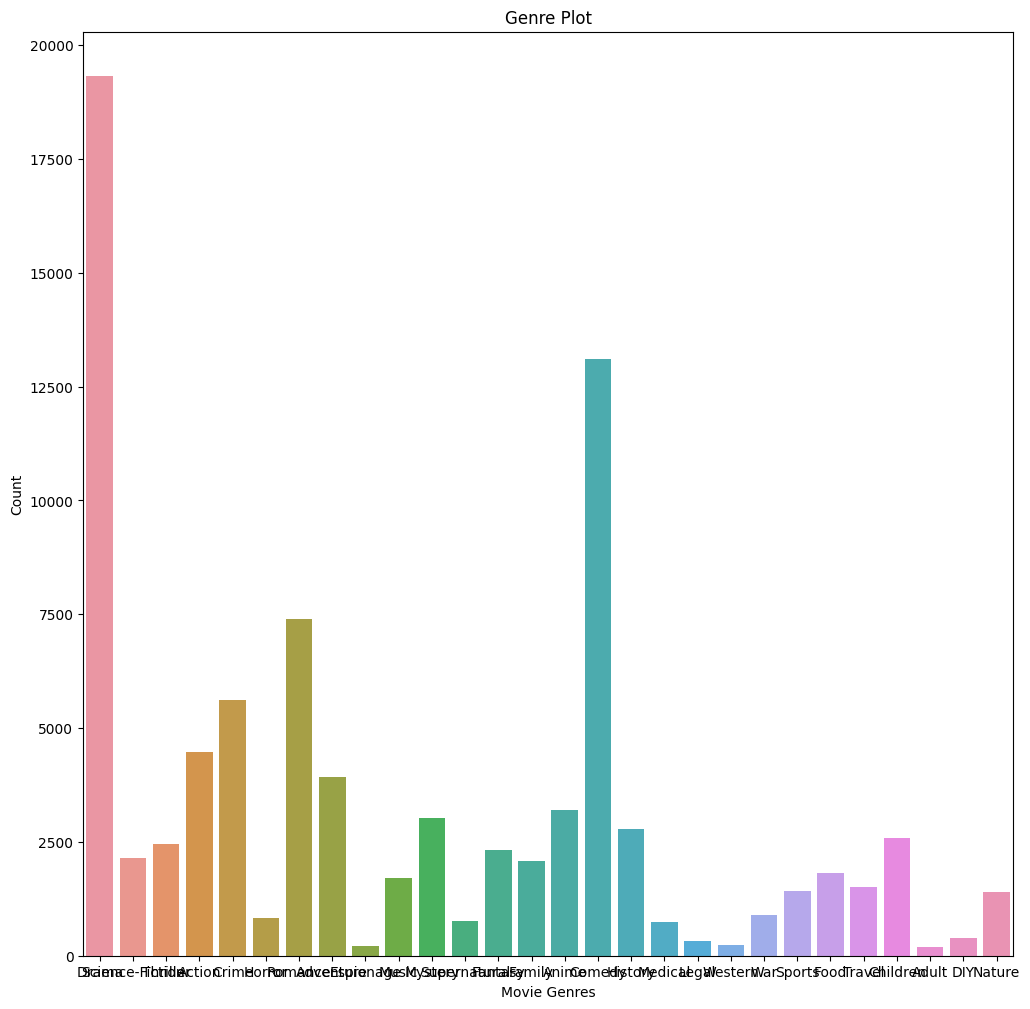

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df_merged)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [26]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [45]:
df_resample=df_resample[df_resample.description!='']
df_resample=df_resample.reset_index(drop=True)
df_resample.to_csv("data.csv")

In [46]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df_resample.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df_resample['description'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = words

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [47]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [48]:
y = df_resample['genre'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (40930, 1000), X_test size: (10233, 1000)


In [49]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [50]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [51]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 44.24%


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('data.csv')
data=data.dropna()

# Preprocessing

X = data['description']
y = data['genre']

# Tokenization
tokenizer = Tokenizer(num_words=300)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200)

# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
NUM_CLASSES=28
# Build model
# Build model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(28, activation='softmax'))  # Adjust the output dimension based on your number of genres
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))
model.save("best_model.h5")

Epoch 1/10
403/403 [==============================] - 680s 2s/step - loss: 3.1051 - accuracy: 0.1030
Epoch 2/10
403/403 [==============================] - 680s 2s/step - loss: 2.7436 - accuracy: 0.2017
Epoch 3/10
403/403 [==============================] - 693s 2s/step - loss: 2.5482 - accuracy: 0.2589
Epoch 4/10
403/403 [==============================] - 700s 2s/step - loss: 2.4382 - accuracy: 0.2898
Epoch 5/10
 89/403 [=====>........................] - ETA: 9:07 - loss: 2.3326 - accuracy: 0.3209

KeyboardInterrupt: 

In [1]:
import pandas as pd

# Tạo DataFrame mẫu
data = {'id': [1, 1, 2, 2, 3],
        'value': ['A', 'B', 'C', 'D', 'E']}
df = pd.DataFrame(data)

# Gộp những phần tử có cùng id thành một list
grouped_df = df.groupby('id')['value'].apply(list).reset_index()

# In DataFrame sau khi gộp
print(grouped_df)

   id   value
0   1  [A, B]
1   2  [C, D]
2   3     [E]


In [ ]:
import pandas as pd

# Giả sử df là DataFrame của bạn
# df = pd.DataFrame(your_data)

# Tạo một DataFrame mẫu
data = {'Text': ['<p>This is an example</p>', 'Some text with </b> tag', 'Another <p> example </b>']}
df = pd.DataFrame(data)

# Loại bỏ các chuỗi <p> và </b> từ cột 'Text'
df['Text'] = df['Text'].str.replace('<p>', '').str.replace('</b>', '')

# In DataFrame sau khi loại bỏ các chuỗi
print(df)

                     Text
0  This is an example</p>
1     Some text with  tag
2       Another  example 


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Chuẩn bị dữ liệu
movie_descriptions = df_merged['description'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(movie_descriptions)

# Biểu diễn mô tả mới
new_description = ["fairy tales in this irreverent animated series"]
new_description_vector = vectorizer.transform(new_description)
# Tính toán độ tương đồng
similarity_scores = cosine_similarity(new_description_vector, X)
# Sắp xếp kết quả
top_indices = similarity_scores[0].argsort()[-3:][::-1]
print(top_indices)

# In ra top 3 bộ phim gần nhất
for index in top_indices:
    print(f"Movie: {df_merged.iloc[index]['showname']}, Similarity: {similarity_scores[0][index]}")

[82475 82474 73583]
Movie: Timeless Tales from Hallmark, Similarity: 0.5640792677527735
Movie: Timeless Tales from Hallmark, Similarity: 0.5640792677527735
Movie: A Tale Dark & Grimm, Similarity: 0.4389237660377196


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize

# Chuẩn bị dữ liệu
movie_descriptions = df_merged['description'].tolist()

# Sử dụng TfidfVectorizer để biểu diễn văn bản
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(movie_descriptions)

# Chuẩn hóa vectơ
X_normalized = normalize(X)

# Sử dụng KNN để tìm kiếm các mô tả tương tự
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(X_normalized)

# Biểu diễn mô tả mới
new_description = ["is a drama series inspired by the classic Grimm Brothers' Fairy Tales"]
new_description_vector = vectorizer.transform(new_description)
new_description_vector_normalized = normalize(new_description_vector)

# Tìm kiếm top 3 bộ phim gần nhất
distances, indices = knn_model.kneighbors(new_description_vector_normalized)

# In ra top 3 bộ phim gần nhất
for index in indices[0]:
    print(f"Movie: {df_merged.iloc[index]['showname']}, Similarity: {1 - distances[0][index]}")

IndexError: ignored